In [4]:
%matplotlib inline 

In [10]:
import pandas
import os, os.path

In [29]:
d = pandas.read_csv(os.path.expanduser('~/git/dissertation/days-written'), names=['date'],
                    header=None, 
                        
                    converters={'date': pandas.to_datetime})

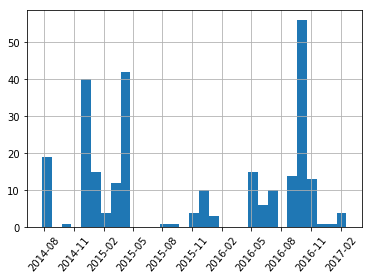

In [57]:
d.date.hist(xrot=50, bins=((d.date.min().now() - d.date.min()).days / 30))